## Policy Iteration Algorithm



In [1]:
import sys
sys.path.append('/home/gabe/.local/lib/python3.8/site-packages')

In [2]:
%matplotlib inline
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import seaborn
import matplotlib.pyplot as plt
import math
from datetime import datetime

In [3]:
problem = "FrozenLake8x8-v0"
if problem == "FrozenLake-v0":
    psize = 4
else:
    psize = 8
    
env = gym.make(problem)

In [4]:
def value_function(env, V, model, s, a, discount_rate):
    sum_vf = 0  # state value for state s
    for transition_probability, state, rewards, final_state in model[s][a]:     # see note #1 !
        # p  - transition probability from (s,a) to (s')
        # s_ - next state (s')
        # r  - reward on transition from (s,a) to (s')
        sum_vf += transition_probability * (rewards + discount_rate * V[state])
    return sum_vf

In [5]:
def policy_iteration(action_space_size,state_space_size,model, gamma, theta):
    
    V = np.zeros(state_space_size)
    pi = np.zeros(state_space_size,dtype=int)
    
    count_evaluations = 0
    count_improvements = 0
    
    while True:
    
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(state_space_size):
                v = V[s]
                V[s] = value_function(env, V, model, s, pi[s], gamma)
                delta = max(delta, abs(v - V[s]))
            if delta < theta: break
            count_evaluations +=1

        # 3. Policy Improvement
        policy_stable = True
        for s in range(state_space_size):
            old_action = pi[s]
            pi[s] = np.argmax([value_function(env, V, model, s, a, gamma)
                               for a in range(action_space_size)])
            if old_action != pi[s]: policy_stable = False
        if policy_stable: break
        count_improvements +=1
    
    print("Evaluations:" + str(count_evaluations))
    print("Improvements: " + str(count_improvements))
    return V, pi

In [6]:
print("Starting: " + str(datetime.now()))
value, policy = policy_iteration(env.action_space.n, env.observation_space.n, env.env.P, 0.99, 1e-8)
it_took = datetime.now() - starting

print("It took:" + str(it_took))

Starting: 2021-04-25 13:05:50.924617
Evaluations:1824
Improvements: 10
Ending: 2021-04-25 13:05:51.198617


In [7]:
print(value.reshape([8, -1]))

[[0.41464034 0.4272052  0.44614821 0.46832036 0.4924437  0.51656982
  0.5352615  0.54097521]
 [0.4116864  0.42120781 0.43749571 0.45838854 0.48324012 0.51353177
  0.54576785 0.5573684 ]
 [0.39675207 0.39384053 0.37549626 0.         0.42167798 0.4938192
  0.56121207 0.5858589 ]
 [0.36927226 0.35298252 0.30653122 0.20040371 0.30075274 0.
  0.56901588 0.62825903]
 [0.33266388 0.29137534 0.19730916 0.         0.28929025 0.3619518
  0.53481945 0.68969731]
 [0.30613624 0.         0.         0.08627639 0.21393259 0.27271394
  0.         0.77203552]
 [0.28888547 0.         0.05769638 0.04751101 0.         0.25052148
  0.         0.87776874]
 [0.28038882 0.200815   0.1273265  0.         0.23959086 0.48644205
  0.7371033  0.        ]]


In [8]:
#Describe Optimal Policy

a2w = {0:'<', 1:'v', 2:'>', 3:'^'}
policy_arrows = np.array([a2w[x] for x in policy])
print(np.array(policy_arrows).reshape([-1, 8]))

[['^' '>' '>' '>' '>' '>' '>' '>']
 ['^' '^' '^' '^' '^' '>' '>' 'v']
 ['^' '^' '<' '<' '>' '^' '>' 'v']
 ['^' '^' '^' 'v' '<' '<' '>' '>']
 ['<' '^' '<' '<' '>' 'v' '^' '>']
 ['<' '<' '<' 'v' '^' '<' '<' '>']
 ['<' '<' 'v' '<' '<' '<' '<' '>']
 ['<' 'v' '<' '<' 'v' '>' 'v' '<']]


In [9]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [10]:
policy.reshape([-1, 8])

array([[3, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 2, 2, 1],
       [3, 3, 0, 0, 2, 3, 2, 1],
       [3, 3, 3, 1, 0, 0, 2, 2],
       [0, 3, 0, 0, 2, 1, 3, 2],
       [0, 0, 0, 1, 3, 0, 0, 2],
       [0, 0, 1, 0, 0, 0, 0, 2],
       [0, 1, 0, 0, 1, 2, 1, 0]])

In [11]:
def fancy_visual(value_func,policy_int, psize):    
    grid = psize
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, psize):
        for i in range(0, psize):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    #plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

Value Function [0.41464034 0.4272052  0.44614821 0.46832036 0.4924437  0.51656982
 0.5352615  0.54097521 0.4116864  0.42120781 0.43749571 0.45838854
 0.48324012 0.51353177 0.54576785 0.5573684  0.39675207 0.39384053
 0.37549626 0.         0.42167798 0.4938192  0.56121207 0.5858589
 0.36927226 0.35298252 0.30653122 0.20040371 0.30075274 0.
 0.56901588 0.62825903 0.33266388 0.29137534 0.19730916 0.
 0.28929025 0.3619518  0.53481945 0.68969731 0.30613624 0.
 0.         0.08627639 0.21393259 0.27271394 0.         0.77203552
 0.28888547 0.         0.05769638 0.04751101 0.         0.25052148
 0.         0.87776874 0.28038882 0.200815   0.1273265  0.
 0.23959086 0.48644205 0.7371033  0.        ]
Policy [3 2 2 2 2 2 2 2 3 3 3 3 3 2 2 1 3 3 0 0 2 3 2 1 3 3 3 1 0 0 2 2 0 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 2 1 0]


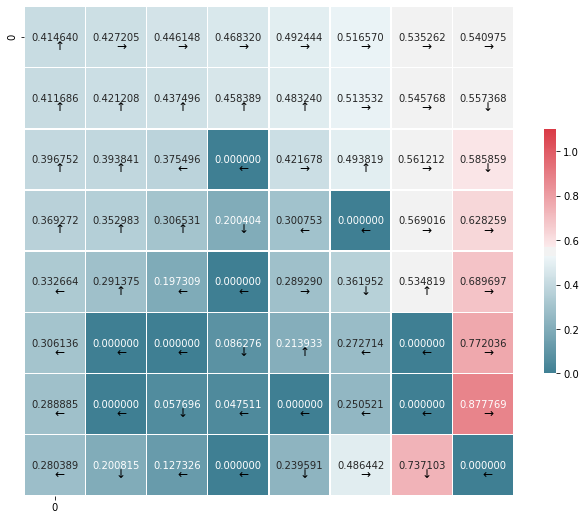


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [12]:
fancy_visual(value, policy, psize)
env.render()